# Introduction
### I will talk about the data i have selected which is Soccer Database.
#### I selected this data because i love football and the most reason for selecting these data is i knew in football very much which make it easy for me to analyse these data.
#### I will follow all the steps that i was learned from Udacity and other places to make this analysis powerful and easy to understand from all genre of people.
#### The questions I want to answer are:
#### 1- Who is the best player in the world?
#### 2- How many goals for each season and Which season have scored the most goals?
#### 3- Who are the best two player in penalties for each season with his score?
#### 4- Who are the best two players for each season with their score?
#### 5- Who are the best two player in finishing for each season with their score?
#### 6- Who are the best two teams in defence pressure for each season?
#### 7- What is the realtionship between ball control, crossing, finishing and short passing ?
#### 8- Who is the best team in buildup play speed ?

# ------------------------------------------------------------------------------------------------------------

# Data Wrangling
### Data wrangling process consist of three steps :
##### * Gathering Data
##### * Assessing Data
##### * Cleaning Data

## Gathering Data
### First, We gathered data from database

In [2]:
# we imported libraries we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [3]:
# we got our data
con = sqlite3.connect('database.sqlite')
df_country = pd.read_sql_query("SELECT * FROM Country", con)
df_league = pd.read_sql_query("SELECT * FROM League", con)
df_match = pd.read_sql_query("SELECT * FROM Match", con)
df_player = pd.read_sql_query("SELECT * FROM Player", con)
df_player_attr = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
df_team = pd.read_sql_query("SELECT * FROM Team", con)
df_team_attr = pd.read_sql_query("SELECT * FROM Team_Attributes", con)

## Assessing Data
## Cleaning Data
#### We are so lucky because the data we gathered are clean but still need to work with it.
#### for example convert data type of some columns
#### There are some missing columns needed to be add
#### unfortunately, there are missing values but i didn't drop these columns 

In [4]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [5]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [6]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [7]:
df_match.sample(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
8820,8821,7809,7809,2011/2012,19,2012-01-29 00:00:00,1030204,9905,8358,3,...,5.00,1.73,3.80,5.4,1.72,3.50,4.75,1.70,3.75,4.75
233,234,1,1,2008/2009,32,2009-05-02 00:00:00,493096,9996,9993,3,...,2.63,2.60,3.20,2.4,2.60,3.15,2.50,2.50,3.20,2.50
21191,21192,19694,19694,2014/2015,29,2015-03-14 00:00:00,1726191,8597,9800,1,...,NaN,2.45,3.30,3.0,NaN,NaN,NaN,NaN,NaN,NaN
19568,19569,17642,17642,2015/2016,28,2016-04-02 00:00:00,2016053,7844,8613,1,...,NaN,2.00,3.25,4.1,NaN,NaN,NaN,NaN,NaN,NaN
19950,19951,19694,19694,2009/2010,13,2009-11-28 00:00:00,658876,8467,8429,1,...,3.75,1.75,3.40,4.6,1.85,3.30,4.00,1.91,3.30,3.75


In [8]:
league_name = dict(df_country.values)
league_name

{1: 'Belgium',
 1729: 'England',
 4769: 'France',
 7809: 'Germany',
 10257: 'Italy',
 13274: 'Netherlands',
 15722: 'Poland',
 17642: 'Portugal',
 19694: 'Scotland',
 21518: 'Spain',
 24558: 'Switzerland'}

In [9]:
# we make sure that the country_id = league_id for more summarized in code
all(df_match.country_id == df_match.league_id)

df_match['league_name'] = df_match['country_id'].map(league_name)

In [10]:
df_match.sample(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league_name
16302,16303,15722,15722,2010/2011,20,2011-04-03 00:00:00,838690,8020,2186,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poland
17148,17149,15722,15722,2013/2014,8,2013-09-22 00:00:00,1467899,8673,8020,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poland
17109,17110,15722,15722,2013/2014,30,2014-04-12 00:00:00,1467954,8023,8024,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poland
12680,12681,10257,10257,2014/2015,24,2015-02-22 00:00:00,1786247,9876,8686,1,...,5.5,3.75,1.73,NaN,NaN,NaN,NaN,NaN,NaN,Italy
16843,16844,15722,15722,2012/2013,28,2013-05-25 00:00:00,1219268,8030,8569,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poland


In [11]:
df_match.columns.values

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

In [12]:
df_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [13]:
# birthday column should be datetime instead of string for more comfortable with dealing
df_player.birthday = pd.to_datetime(df_player.birthday)
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null datetime64[ns]
height                11060 non-null float64
weight                11060 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 605.0+ KB


In [14]:
# we can add a new column called age after we convert datatype of birthday column.
df_player['age'] = 2021 - df_player.birthday.dt.year

In [15]:
# we add player_name to the player attributes dataframe
player_name = dict(df_player[['player_api_id', 'player_name']].values)
df_player_attr['player_name'] = df_player_attr.player_api_id.map(player_name)
df_player_attr

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,Zvjezdan Misimovic
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic


In [16]:
#df_player_attr.info()
df_player_attr.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003368,0.001987,-0.002875,0.001217,-0.019149,-0.007882,-0.011295,-0.006132,-0.006343,...,-0.007731,-0.010620,-0.009555,-0.012196,-0.010689,0.013980,0.010436,0.008645,0.013563,0.014152
player_fifa_api_id,0.003368,1.000000,0.554620,-0.274089,-0.027619,-0.064183,-0.028010,-0.104655,-0.064219,-0.087743,...,-0.164171,-0.182479,-0.077979,-0.073212,-0.054321,-0.091737,-0.143113,-0.267489,-0.145119,-0.135443
player_api_id,0.001987,0.554620,1.000000,-0.322389,0.010991,-0.110620,-0.060387,-0.129488,-0.087320,-0.130140,...,-0.188077,-0.164783,-0.089998,-0.086596,-0.072889,-0.071495,-0.128573,-0.238898,-0.128707,-0.124961
overall_rating,-0.002875,-0.274089,-0.322389,1.000000,0.766757,0.357699,0.329298,0.314099,0.458361,0.361470,...,0.431137,0.393189,0.133377,0.165349,0.128889,0.027976,0.004410,0.025682,0.005709,0.005687
potential,0.001217,-0.027619,0.010991,0.766757,1.000000,0.277755,0.286684,0.207706,0.382605,0.301302,...,0.378901,0.316414,0.055758,0.083822,0.063976,-0.011250,0.004742,0.089205,0.003406,0.003962
crossing,-0.019149,-0.064183,-0.110620,0.357699,0.277755,1.000000,0.576860,0.369747,0.790150,0.637891,...,0.693227,0.571473,0.235159,0.285265,0.275467,-0.603898,-0.595610,-0.349559,-0.597625,-0.601580
finishing,-0.007882,-0.028010,-0.060387,0.329298,0.286684,0.576860,1.000000,0.373536,0.579365,0.851339,...,0.651455,0.720388,-0.284603,-0.229699,-0.260890,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173
heading_accuracy,-0.011295,-0.104655,-0.129488,0.314099,0.207706,0.369747,0.373536,1.000000,0.548700,0.391638,...,0.337184,0.431336,0.461543,0.480624,0.441769,-0.665365,-0.647876,-0.391540,-0.647738,-0.651373
short_passing,-0.006132,-0.064219,-0.087320,0.458361,0.382605,0.790150,0.579365,0.548700,1.000000,0.640253,...,0.765336,0.609537,0.350171,0.415678,0.380990,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926
volleys,-0.006343,-0.087743,-0.130140,0.361470,0.301302,0.637891,0.851339,0.391638,0.640253,1.000000,...,0.689852,0.711830,-0.168972,-0.106926,-0.126398,-0.508823,-0.487015,-0.279030,-0.490968,-0.492979


In [17]:
# date column should be datetime type
df_player_attr.date = pd.to_datetime(df_player_attr.date)

In [18]:
# we can add a new column called season
df_player_attr['season'] = df_player_attr.date.dt.year

In [19]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 44 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null datetime64[ns]
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float6

Text(0.5, 1.0, "Most common players' shot power")

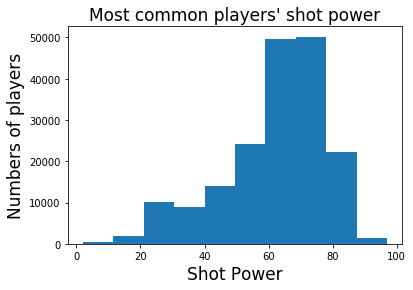

In [45]:
df_player_attr[['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']]
df_player_attr[['shot_power']].plot(kind='hist', legend=False)
plt.xlabel('Shot Power', size=17)
plt.ylabel('Numbers of players', size=17)
plt.title("Most common players' shot power", size=17)

In [21]:
df_team.sample(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
46,4225,8602,110.0,Wolverhampton Wanderers,WOL
25,3457,10260,11.0,Manchester United,MUN
278,45333,8370,480.0,Rayo Vallecano,RAY
195,31457,8028,111086.0,Piast Gliwice,PIG
85,11822,4087,111271.0,Évian Thonon Gaillard FC,ETG


In [22]:
df_team_attr.sample(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
748,749,1844,8537,2010-02-22 00:00:00,30,Slow,NaN,Little,30,Short,...,55,Normal,Organised,30,Deep,30,Contain,30,Narrow,Offside Trap
264,265,1842,8529,2014-09-19 00:00:00,63,Balanced,51.0,Normal,53,Mixed,...,68,Lots,Organised,37,Medium,56,Press,51,Normal,Cover
68,69,112513,158085,2014-09-19 00:00:00,69,Fast,66.0,Normal,39,Mixed,...,46,Normal,Organised,35,Medium,37,Press,37,Normal,Cover
1125,1126,1837,9882,2011-02-22 00:00:00,50,Balanced,NaN,Little,65,Mixed,...,50,Normal,Organised,35,Medium,45,Press,55,Normal,Cover
411,412,111271,4087,2012-02-22 00:00:00,53,Balanced,NaN,Little,44,Mixed,...,64,Normal,Organised,47,Medium,56,Press,50,Normal,Cover


In [23]:
team_long_name = dict(df_team[['team_api_id', 'team_long_name']].values)
team_long_name

{9987: 'KRC Genk',
 9993: 'Beerschot AC',
 10000: 'SV Zulte-Waregem',
 9994: 'Sporting Lokeren',
 9984: 'KSV Cercle Brugge',
 8635: 'RSC Anderlecht',
 9991: 'KAA Gent',
 9998: 'RAEC Mons',
 7947: 'FCV Dender EH',
 9985: 'Standard de Liège',
 8203: 'KV Mechelen',
 8342: 'Club Brugge KV',
 9999: 'KSV Roeselare',
 8571: 'KV Kortrijk',
 4049: 'Tubize',
 9996: 'Royal Excel Mouscron',
 10001: 'KVC Westerlo',
 9986: 'Sporting Charleroi',
 9997: 'Sint-Truidense VV',
 9989: 'Lierse SK',
 6351: 'KAS Eupen',
 1773: 'Oud-Heverlee Leuven',
 8475: 'Waasland-Beveren',
 8573: 'KV Oostende',
 274581: 'Royal Excel Mouscron',
 10260: 'Manchester United',
 10261: 'Newcastle United',
 9825: 'Arsenal',
 8659: 'West Bromwich Albion',
 8472: 'Sunderland',
 8650: 'Liverpool',
 8654: 'West Ham United',
 8528: 'Wigan Athletic',
 10252: 'Aston Villa',
 8456: 'Manchester City',
 8668: 'Everton',
 8655: 'Blackburn Rovers',
 8549: 'Middlesbrough',
 8586: 'Tottenham Hotspur',
 8559: 'Bolton Wanderers',
 10194: 'Stoke

In [24]:
# we add team name column
df_team_attr['team_long_name'] = df_team_attr.team_api_id.map(team_long_name)

In [25]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [26]:
df_team_attr['date'] = pd.to_datetime(df_team_attr['date'])
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null datetime64[ns]
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreatio

In [27]:
# we should add season column
df_team_attr['season'] = df_team_attr.date.dt.year

In [28]:
df_team_attr.sample(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,season
187,188,160,9911,2012-02-22,40,Balanced,NaN,Little,48,Mixed,...,Organised,34,Medium,53,Press,49,Normal,Cover,VfL Bochum,2012
916,917,171,8165,2012-02-22,44,Balanced,NaN,Little,49,Mixed,...,Organised,30,Deep,40,Press,43,Normal,Cover,1. FC Nürnberg,2012
26,27,1901,10215,2015-09-10,53,Balanced,53.0,Normal,44,Mixed,...,Organised,39,Medium,38,Press,61,Normal,Cover,Académica de Coimbra,2015
491,492,110556,10233,2011-02-22,65,Balanced,NaN,Little,35,Mixed,...,Free Form,54,Medium,65,Press,35,Normal,Cover,Genoa,2011
784,785,169,9905,2012-02-22,68,Fast,NaN,Little,57,Mixed,...,Organised,52,Medium,65,Press,53,Normal,Cover,1. FSV Mainz 05,2012


# ------------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis
### It one of the most important step in Data Analysis process.
### In this step you should know how to ask a good questions, At the same time you should know how to answer these questions accurately.
### It is not easy process but it is interesting.
# ----------------

### Who is the best player in the world?

In [29]:
dicti = dict(df_player_attr.groupby('player_name')['overall_rating'].mean())
max = 0
player = ""
for i in dicti.items():
    if i[1] > max:
        max = i[1]
        player = i[0]
print(player, max)

Lionel Messi 92.1923076923077


# ----------------------

### How many goals for each season and which season have scored the most goals.?

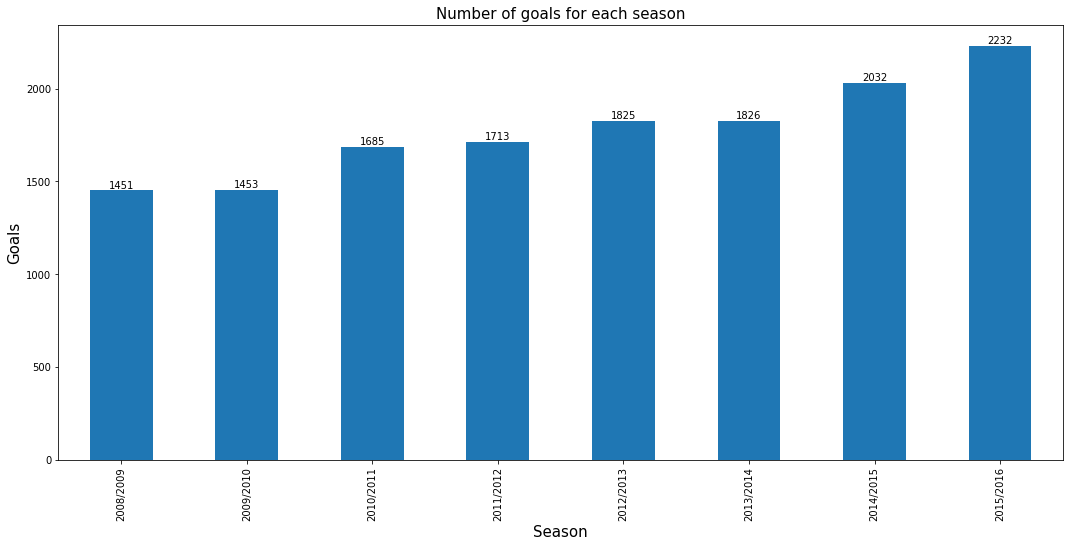

In [30]:
# we plot how many goals for each season
plt.figure(figsize=(18, 8))
plots = df_match.groupby('season')['goal'].count().plot(kind='bar')
plt.title('Number of goals for each season', size=15)
plt.xlabel('Season', size=15)
plt.ylabel('Goals', size=15)

# This code for writing number of goals on each column for more readable
for bar in plots.patches:
    plots.annotate(bar.get_height(), (bar.get_x() + bar.get_width()/2, bar.get_height()), ha = 'center', va = 'center', size = 10, xytext = (0, 5), textcoords='offset points')

 We first create a figure then we group the data by seasons and calculate the numbers of goals for each season.
 
 We make the plot more readable by putting x and y label and title.
 
 The last line of code is interesting for me , we put above each column the number of goals So there is no misleading

# ------------------------------------------------------------------------------------------------------
### Who are the best two player in penalties for each season with his score ?

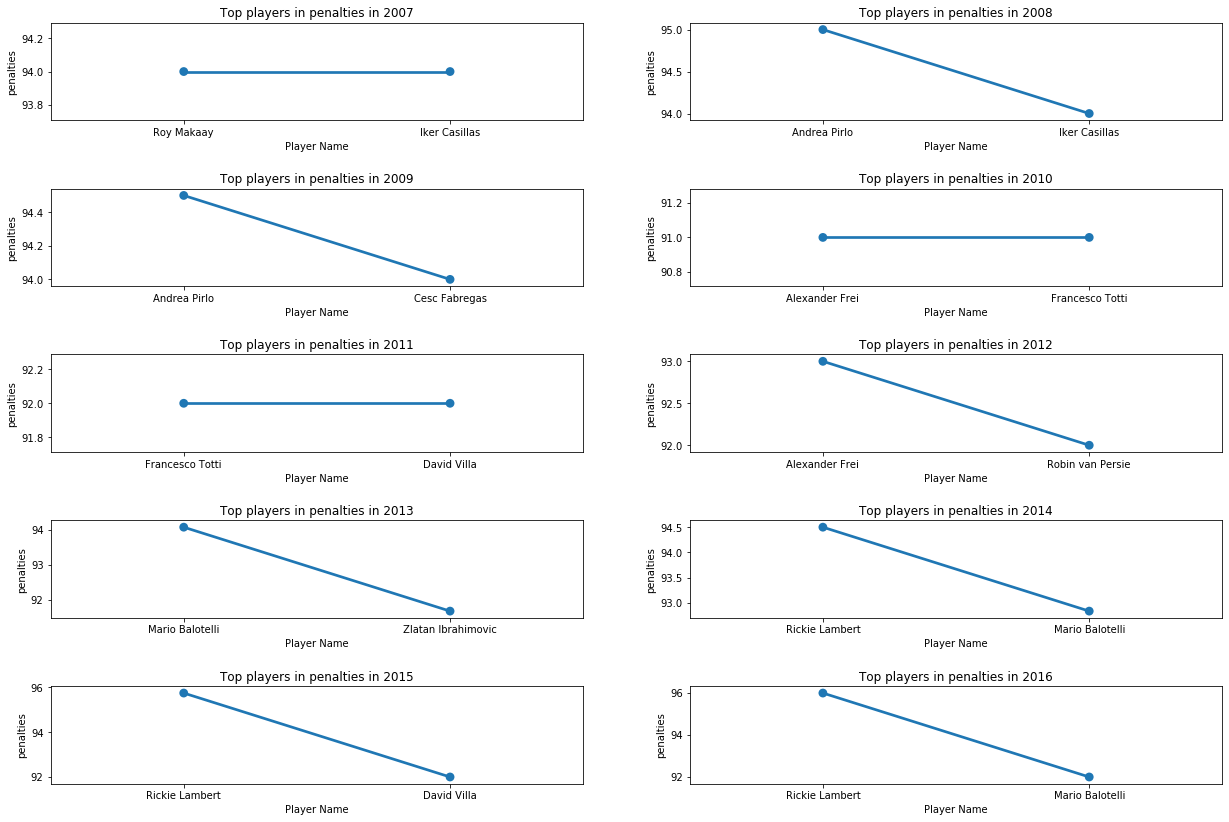

In [31]:
# The best two players for each season in penalties
penalties = df_player_attr.groupby(['season', 'player_name'])['penalties'].mean()
plt.figure(figsize=(21, 14))
seasons = sorted(df_player_attr.season.unique())
r = 1
for season in seasons:
    plt.subplot(5, 2, r)
    x_p = penalties[(penalties.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:2]
    
    sns.pointplot(x=x_p.index.get_level_values(1), y=x_p.values)
    plt.xlabel('Player Name')
    plt.ylabel('penalties')
    plt.title(f'Top players in penalties in {season}')
    r+=1
    
# This code makes the plots not intersect
plt.subplots_adjust(hspace=.7, wspace=0.2)

We needed to know who are the best two player for each season in penalties.

We grouped the data by two indexs (season, player name) and calculate the average of the penalties.

We created a seasons variable which contian a list of all seasons , we needed it in iteration.

We iterated over seasons then we create a new figure for each season.

We create a x dataframe which sort data in decending order and select only the first two rows.

Then we plotted a pointplot which the x axis is the player name and the y axis is the average rating in penalties.

We putted the labels and title.

The last line of the code made some space between each plot.

# -----------------------------------------------------------------------------------------------------
### Who are the best two players for each season with their score ?

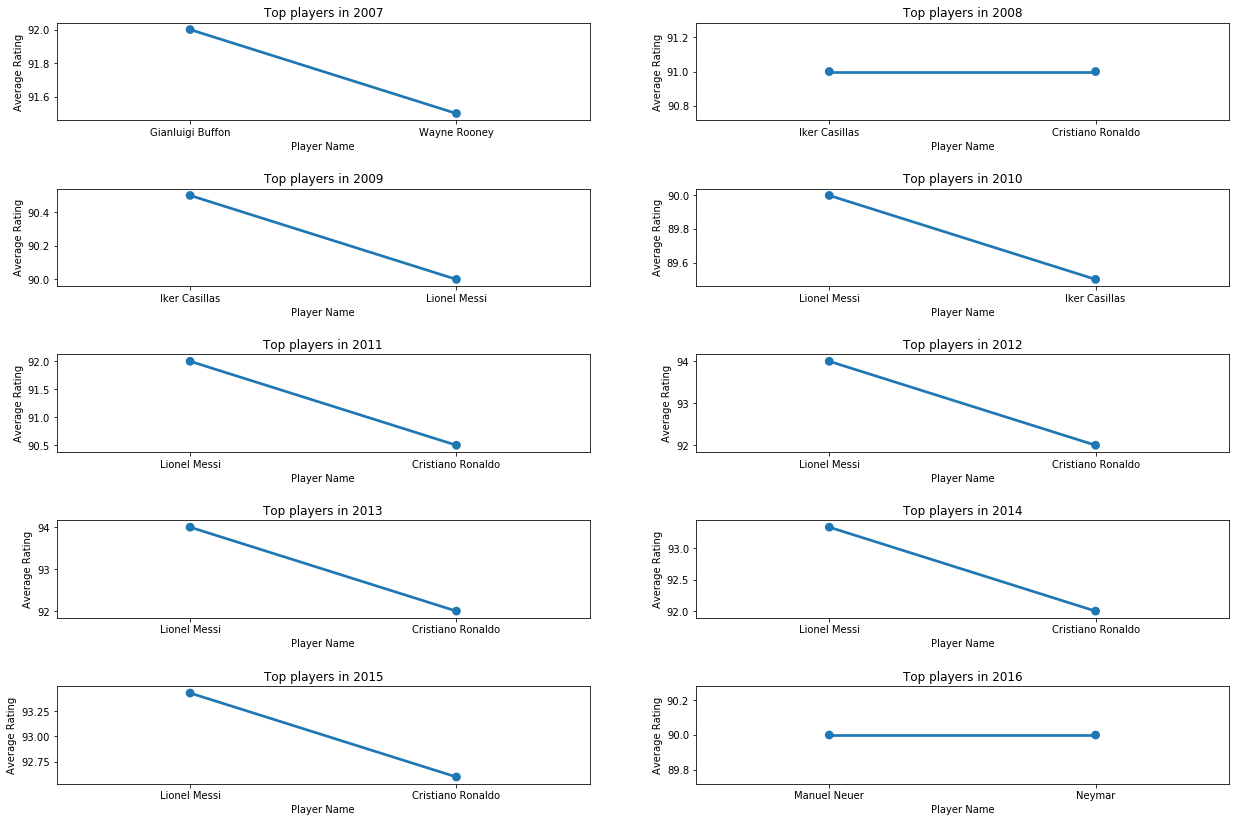

In [32]:
# The best three players for each season with their average rating
overall_rating = df_player_attr.groupby(['season', 'player_name'])['overall_rating'].mean()
plt.figure(figsize=(21, 14))
i = 1
for season in seasons:
    plt.subplot(5, 2, i)
    x_over = overall_rating[(overall_rating.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:2]
    
    sns.pointplot(x=x_over.index.get_level_values(1), y=x_over.values)
    plt.xlabel('Player Name')
    plt.ylabel('Average Rating')
    plt.title(f'Top players in {season}')
    i+=1
    
# This code makes the plots not intersect
plt.subplots_adjust(hspace=.7, wspace=0.2)

We needed to know who are the best two players in each season with thier score.

We grouped data by two index too (season, player name) and calculate the average of overall rating.

We iterated over seasons then we create a new figure for each season.

We created a x dataframe which sort data in decending order and select only the first two rows.

Then we plotted a pointplot which the x axis is the player name and the y axis is the average of overall rating.

We putted the labels and title.

# -------------------------------------------------------------------------------------------------
### Who are the best two player in finishing for each season with their score ?

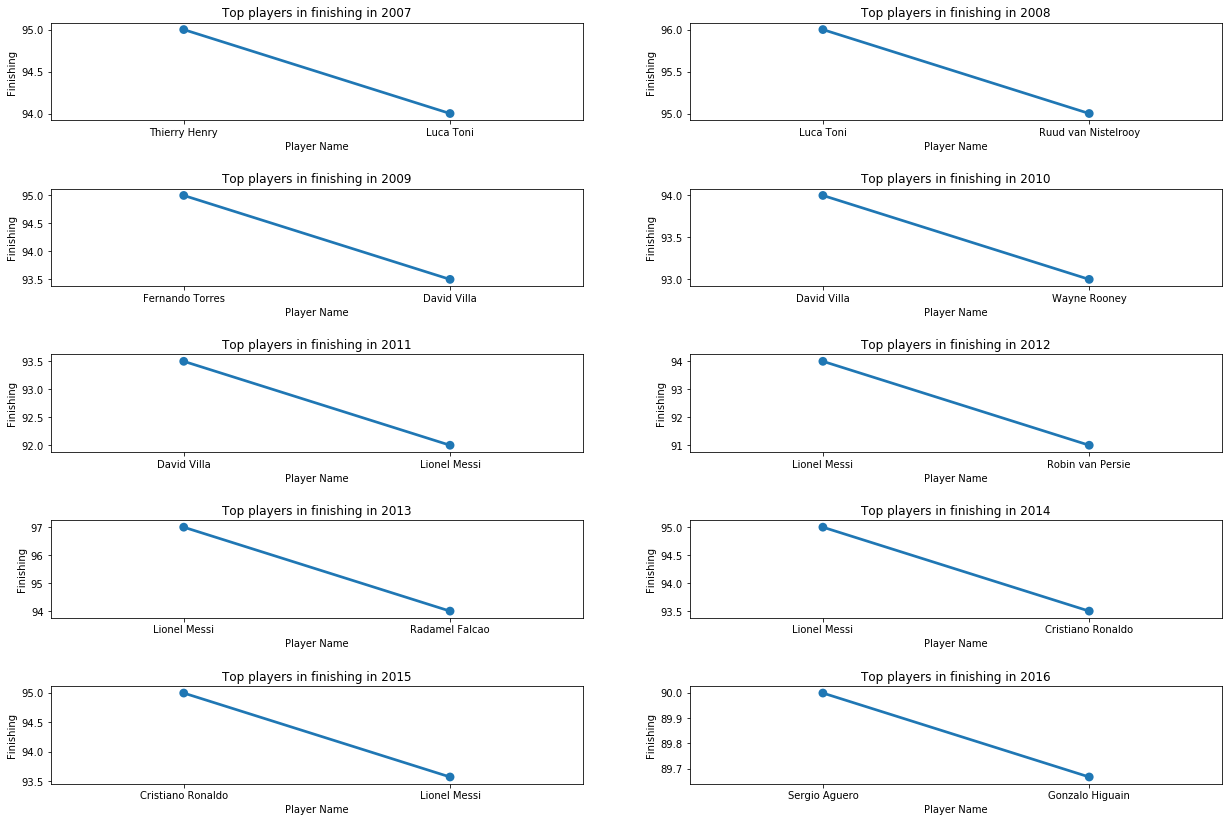

In [33]:
# The best two players for each season in finishing
finishing = df_player_attr.groupby(['season', 'player_name'])['finishing'].mean()
plt.figure(figsize=(21, 14))
s = 1
for season in seasons:
    plt.subplot(5, 2, s)
    x_f = finishing[(finishing.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:2]
    
    sns.pointplot(x=x_f.index.get_level_values(1), y=x_f.values)
    plt.xlabel('Player Name')
    plt.ylabel('Finishing')
    plt.title(f'Top players in finishing in {season}')
    s+=1
    
# This code makes the plots not intersect
plt.subplots_adjust(hspace=.7, wspace=0.2)

We needed to know who are the best two players in each season in finishing with thier score.

We grouped data by two index too (season, player name) and calculate the average of finishing.

We iterated over seasons then we create a new figure for each season.

We created a x dataframe which sort data in decending order and select only the first two rows.

Then we plotted a pointplot which the x axis is the player name and the y axis is the average of finishing.

We putted the labels and title.

# -----------------------------------------------------------------------------------------------
### Who are the best two teams in defence pressure for each season ?

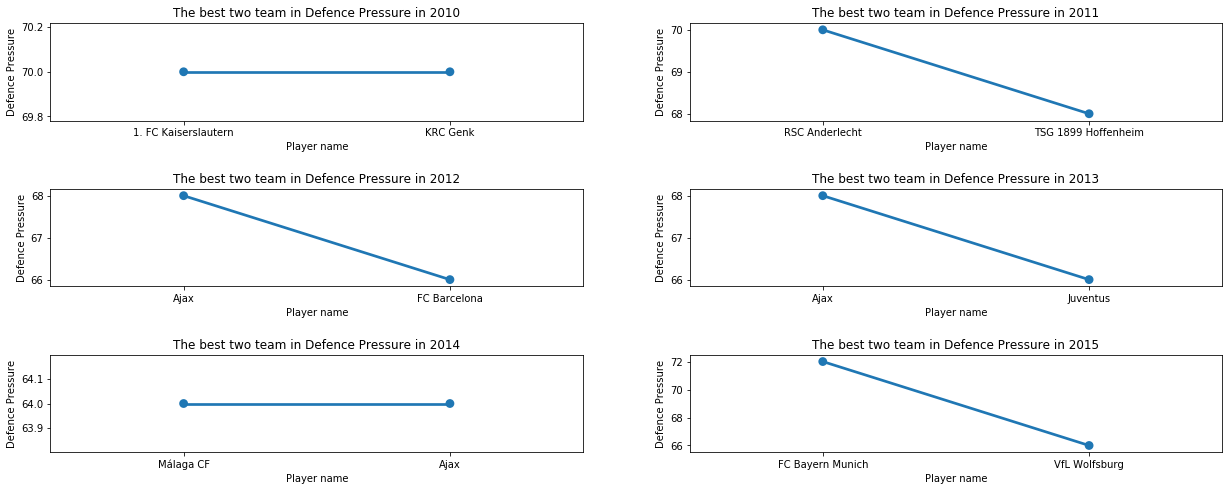

In [34]:
defence_pressure = df_team_attr.groupby(['season', 'team_long_name'])['defencePressure'].mean()
plt.figure(figsize=(21, 14))
# We created this because the data is missing from other seasons
seasons1 = [2010, 2011, 2012, 2013, 2014, 2015]
q = 1
for season in seasons1:
    plt.subplot(5, 2, q)
    x_dp = defence_pressure[(defence_pressure.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:2]
    sns.pointplot(x = x_dp.index.get_level_values(1), y = x_dp.values)
    plt.title(f'The best two team in Defence Pressure in {season}')
    plt.xlabel('Player name')
    plt.ylabel('Defence Pressure')
    q += 1
    
plt.subplots_adjust(hspace=.7, wspace=0.2)

We needed to know who are the best two teams in each season in defence pressure with thier score.

We grouped data by two index too (season, team name) and calculate the average of defence pressure.

When i tried to plot all seasons, there were errors because the data in some seasons missing.

We iterated over seasons then we create a new figure for each season.

We created a x dataframe which sort data in decending order and select only the first two rows.

Then we plotted a pointplot which the x axis is the team name and the y axis is the average of defence pressure.

We putted the labels and title.

# ------------

### What is the relationship between ball control, crossing, finishing and short passing ?

Text(0.5, 1.0, 'The relationship between Ball Control, Crossing, Finishing and Short Passing')

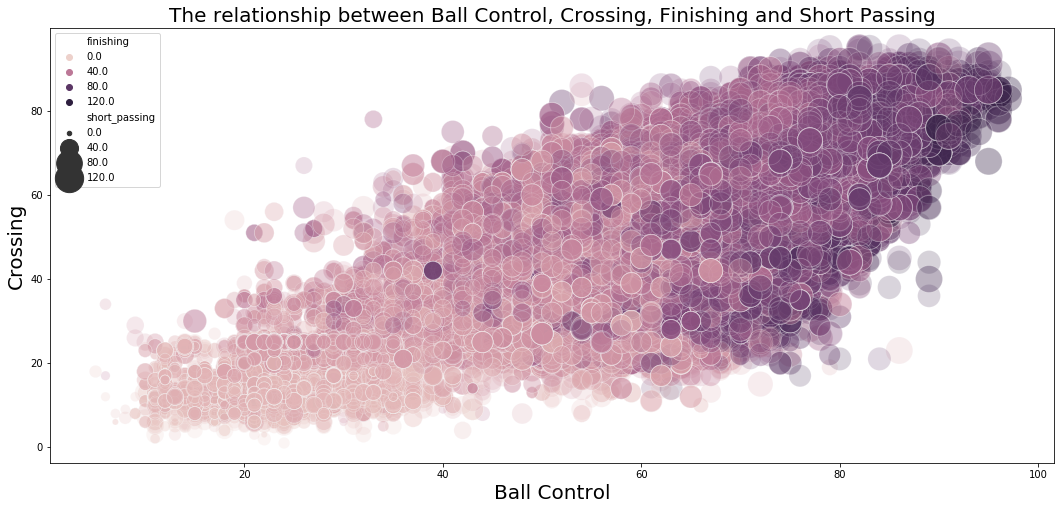

In [35]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x='ball_control', y='crossing', data=df_player_attr, color='blue', hue= 'finishing', size='short_passing', sizes=(20, 800), alpha=.2)
plt.xlabel('Ball Control', size=20)
plt.ylabel('Crossing', size=20)
plt.title("The relationship between Ball Control, Crossing, Finishing and Short Passing", size=20)

# ------------

### Who is the best team in buildup play speed ?

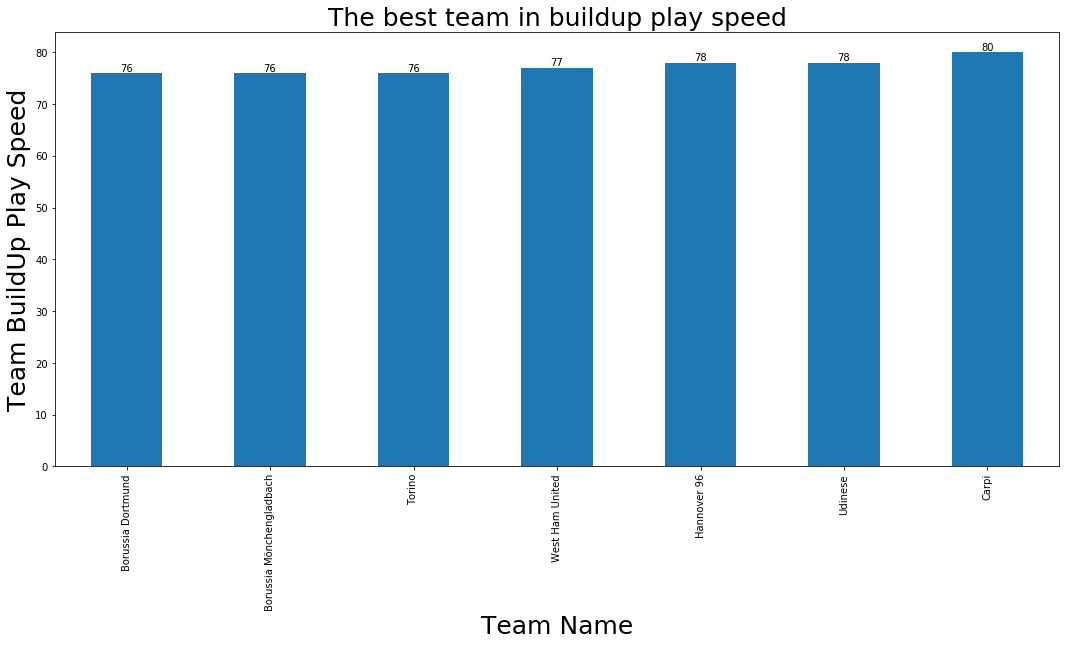

In [36]:
val = df_team_attr.buildUpPlaySpeed.sort_values(ascending=False).iloc[:5].values
play_up = df_team_attr[df_team_attr.buildUpPlaySpeed.isin(list(val))]
plt.figure(figsize=(18, 8))
play_up_group = play_up.groupby('team_long_name')['buildUpPlaySpeed'].mean().sort_values().plot(kind='bar')
plt.xlabel('Team Name', size=25)
plt.ylabel('Team BuildUp Play Speed', size=25)
plt.title('The best team in buildup play speed', size=25)
for bar in play_up_group.patches:
    play_up_group.annotate(bar.get_height(), (bar.get_x() + bar.get_width() / 2 , bar.get_height()), ha='center', va='center', size=10, xytext=(0, 5), textcoords='offset points')

# -----------------------------------------------------------------------------------------------------------

# Conclusions
### It is the final step of data anlaysis process.
### In this step we will discuss the questions and answers.

#### The first question is (Who is the best player in the world?), The answer is Lionel messi.

#### The question number 2 is (How many goals for each season and Which season have scored the most goals.?), The answer of this question in the figure which i plotted and the season which scored the most goals is 2015/2016.
 
#### The question number 3 is (Who are the best two player in penalties for each season with his score ?) and the answer is in season 2007 the best two players in penalties are Roy Makaay and Icar Casillas and in season 2008 Pirlo and Casillas and so on...
 
#### The question number 4 is (Who are the best two players for each season with their score ?) and the answer is in season 2007 the best two players are Buffon and Roony and in season 2008 Casillas and Ronaldo and so on...
 
#### The question number 5 is (Who are the best two player in finishing for each season with their score ?) and the answer is in season 2007 the best two players in finishing are Henry and Toni and in season 2008 Toni and Van Nistrelrooy and so on...
 
#### The question number 6 is (Who are the best two teams in defence pressure for each season ?) and the answer is in season 2010 the best two teams in defence  pressure are FC Kaiserslautern and KRC Genk and in season 2011 RSC Anderlecht and TSG 1899 Hoffenheim and so on..
 
#### The question number 7 is (What is the realtionship between ball control, crossing, finishing and short passing ?), The answer is There are a positive relation between them.

#### The question number 8 is (Who is the best team in buildup plays speed ?), and the answer is carpi team.

### There are many questions that I didn't mention but I selected questions that are the most interesting for me.